In [1]:
from datetime import timedelta
import datetime as dt
from pandas.tseries.offsets import BDay
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from ipywidgets import widgets as wg
from ipywidgets import interactive
from IPython.display import display
from itertools import izip
cmap = plt.get_cmap('viridis')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# entire_stock_analyst_hist_df = pd.read_csv('entire_ticker_analyst_history')
# snp_500_analyst_history_df = pd.read_csv('snp500analyst_history')
# snp_500_stock_history_df = pd.read_csv('snp500stockHistories')
snp_500_merged_data = pd.read_csv('snp500merged')

#uppercase the firms to fix uniformity mistakes
snp_500_merged_data['firm'] = snp_500_merged_data['firm'].str.upper()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Chart Each Ticker

#### Instructions

* 1)Load the imports and databases
* 2)Run the code under this cell
* 3)Type in the symbol into the box and press enter
* 4)Run next cell and select the Institution that you would like to perform analysis (no need to press enter)
* 5)Run the following Cell


In [17]:
def enter_ticker(df):
    ticker = raw_input('Please enter a stock ticker').upper()
    ticker_df = df.loc[df['stockTicker'] == ticker]
    return ticker_df


ticker_data = enter_ticker(snp_500_merged_data)

to_analyst_value_count = ticker_data.firm.value_counts().to_frame().index.values.tolist()

analyst_data = wg.Dropdown(
        options = ['All'] + to_analyst_value_count,
        value = 'All',
        description = 'Analyst Firm:'  
    )

def plot_ticker(df,analyst_data):
    analyst_data_for_ticker_df = df.loc[df['firm'] == analyst_data.value]
    pylab.rcParams['figure.figsize'] = (10,6)
    plt.plot_date(df['Date'],df['Open'],linestyle='solid',marker='None')
    for xc in analyst_data_for_ticker_df.Date:
        plt.axvline(x=xc)

Please enter a stock tickeraapl


In [18]:
analyst_data

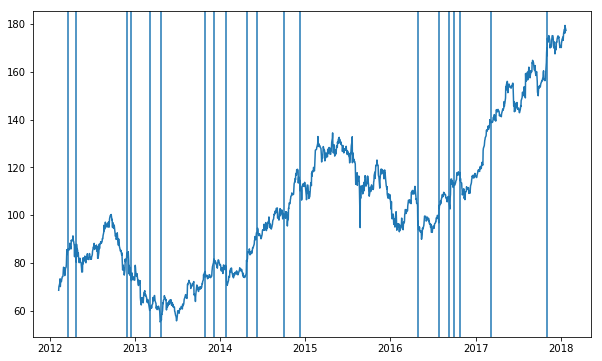

In [19]:
plot_ticker(ticker_data,analyst_data)


### Create a copy of database and add 30,60, and 90 dates from date

In [5]:
snp_500_merged_data_copy = snp_500_merged_data.copy()
snp_500_merged_data_copy['Date'] = pd.to_datetime(snp_500_merged_data_copy['Date'])
snp_500_merged_data_copy['30_days_from_grade_Date'] = snp_500_merged_data_copy.loc[~snp_500_merged_data_copy['firm'].isnull()].Date.apply(lambda x: x + BDay(22))
snp_500_merged_data_copy['60_days_from_grade_Date'] = snp_500_merged_data_copy.loc[~snp_500_merged_data_copy['firm'].isnull()].Date.apply(lambda x: x + BDay(44))
snp_500_merged_data_copy['90_days_from_grade_Date'] = snp_500_merged_data_copy.loc[~snp_500_merged_data_copy['firm'].isnull()].Date.apply(lambda x: x + BDay(66)) 

In [6]:
unique_list = snp_500_merged_data_copy['stockTicker'].unique()
unique_list = unique_list.tolist()

In [12]:
snp_500_merged_data_copy.loc[snp_500_merged_data_copy['stockTicker'] == 'BA']

,Unnamed: 0,stockTicker,Date,firm,action,fromGrade,toGrade,Open,High,Low,Close,Adj Close,Volume,30_days_from_grade_Date,60_days_from_grade_Date,90_days_from_grade_Date
103510,103510,BA,2012-01-18,SOCIETE GENERALE,down,NaN,Sell,74.949997,75.449997,74.769997,75.059998,64.447914,4189500.0,2012-02-17,2012-03-20,2012-04-19
103511,103511,BA,2012-01-19,NaN,NaN,NaN,NaN,75.269997,75.919998,75.099998,75.559998,64.877243,5397300.0,NaT,NaT,NaT
103512,103512,BA,2012-01-20,NaN,NaN,NaN,NaN,75.680000,75.900002,75.139999,75.519997,64.842903,4552300.0,NaT,NaT,NaT
103513,103513,BA,2012-01-23,NaN,NaN,NaN,NaN,75.660004,76.370003,75.320000,75.510002,64.834320,4083700.0,NaT,NaT,NaT
103514,103514,BA,2012-01-24,NaN,NaN,NaN,NaN,75.059998,75.620003,74.599998,75.360001,64.705513,4942700.0,NaT,NaT,NaT
103515,103515,BA,2012-01-25,NaN,NaN,NaN,NaN,73.970001,76.699997,72.849998,75.820000,65.100487,14049100.0,NaT,NaT,NaT
103516,103516,BA,2012-01-26,NaN,NaN,NaN,NaN,75.839996,76.360001,75.000000,75.309998,64.662590,4187400.0,NaT,NaT,NaT
103517,103517,BA,2012-01-27,NaN,NaN,NaN,NaN,74.800003,75.230003,74.400002,74.550003,64.010048,4754600.0,NaT,NaT,NaT
103518,103518,BA,2012-01-30,NaN,NaN,NaN,NaN,73.989998,74.349998,73.680000,74.160004,63.675198,5043000.0,NaT,NaT,NaT
103519,103519,BA,2012-01-31,NaN,NaN,NaN,NaN,74.510002,75.199997,73.959999,74.180000,63.692364,4777200.0,NaT,NaT,NaT


# This part needs help

In [175]:
def all_ticker_grade_futures_df(df):
    full_df = []
    
    for ticker in df['stockTicker'].unique():
        lst30 = []
        days30 = []
        lst60 = []
        days60 = []
        lst90 = []
        days90 = []
        df1 = df.loc[df['stockTicker'] == ticker]
#         for date in df1['30_days_from_grade_Date'].values:
#             if date in df1['Date'].values:
#                 temp = df1.loc[df1['Date']==date].Open.values[0]
#                 days30.append(date)
#                 lst30.append(temp)
            
        for date1 in df1['60_days_from_grade_Date'].values:
            if date1 in df1['Date'].values:
                temp1 = df1.loc[df1['Date']==date1].Open.values[0]
                days60.append(date1)
                lst60.append(temp1)
            
#         for date2 in df1['90_days_from_grade_Date'].values:
#             if date2 in df1['Date'].values:
#                 temp2 = df1.loc[df1['Date']==date2].Open.values[0]
#                 days90.append(date2)
#                 lst90.append(temp2)
            
#         date_time30_df = pd.DataFrame(lst30,days30).reset_index()
#         date_time30_df.columns = ['30_days','30_price']
    date_time60_df = pd.DataFrame(lst60,days60).reset_index()
    date_time60_df.columns = ['60_days','60_price']
#         date_time90_df = pd.DataFrame(lst90,days90).reset_index()
#         date_time90_df.columns = ['90_days','90_price']
    
#         df1 = pd.merge(df1,date_time30_df,how='left',left_on='30_days_from_grade_Date',right_on='30_days')
#         df1 = pd.merge(df1,date_time60_df,how='left',left_on='60_days_from_grade_Date',right_on='60_days')
#         df1 = pd.merge(df1,date_time90_df,how='left',left_on='90_days_from_grade_Date',right_on='90_days')
#         full_df.append(df1)
        
#     concat_full_list_to_pd = pd.concat(full_df)
    print date_time60_df


In [176]:
with_grade_futures = all_ticker_grade_futures_df(snp_500_merged_data_copy)

      60_days   60_price
0  2013-05-08  33.000000
1  2013-05-09  33.310001
2  2013-05-10  33.540001
3  2013-05-13  33.060001
4  2013-05-13  33.060001
5  2013-05-14  33.130001
6  2013-05-14  33.130001
7  2013-05-14  33.130001
8  2013-05-14  33.130001
9  2013-05-14  33.130001
10 2013-05-14  33.130001
11 2013-05-14  33.130001
12 2013-05-21  33.570000
13 2013-05-22  32.549999
14 2013-06-03  32.009998
15 2013-07-29  30.270000
16 2013-08-26  30.160000
17 2013-08-27  29.530001
18 2013-08-28  29.070000
19 2013-09-05  29.719999
20 2013-09-12  31.360001
21 2013-12-05  31.200001
22 2014-01-24  31.510000
23 2014-03-11  30.469999
24 2014-04-15  28.570000
25 2014-06-13  31.959999
26 2014-09-12  36.209999
27 2014-10-10  37.020000
28 2014-11-11  40.160000
29 2014-11-14  43.189999
..        ...        ...
43 2015-04-16  46.799999
44 2015-07-07  48.540001
45 2015-07-07  48.540001
46 2015-07-22  49.049999
47 2015-08-05  48.950001
48 2015-08-27  44.709999
49 2015-09-23  44.200001
50 2015-10-07  41.590000


In [139]:
print lst60

[75.089995999999999, 70.930000000000007, 71.300003000000004, 70.980002999999996, 74.5, 70.319999999999993, 70.769997000000004, 70.290001000000004, 70.290001000000004, 70.110000999999997, 71.489998, 75.970000999999996, 75.970000999999996, 75.970000999999996, 75.709998999999996, 81.010002, 83.099997999999999, 85.849997999999999, 86.410004000000001, 84.300003000000004, 87.349997999999999, 94.309997999999993, 94.309997999999993, 94.919997999999993, 94.919997999999993, 94.919997999999993, 99.559997999999993, 99.360000999999997, 102.69000200000001, 102.410004, 104.5, 107.129997, 107.129997, 106.360001, 106.160004, 107.639999, 119.31999999999999, 135.36000100000001, 135.36000100000001, 133.0, 133.64999399999999, 138.69000199999999, 141.46000700000002, 129.75, 124.989998, 130.66999799999999, 130.66999799999999, 130.429993, 131.66000400000001, 134.16999799999999, 137.58999599999999, 132.61000100000001, 129.03999299999998, 127.790001, 120.510002, 120.66999799999999, 127.459999, 127.459999, 125.3

In [60]:
month_price_list

[75.529999,
 73.589996,
 71.209999,
 72.699997,
 74.199997,
 73.099998,
 70.32,
 70.32,
 71.269997,
 73.519997,
 73.400002,
 73.400002,
 73.400002,
 75.839996,
 76.32,
 77.239998,
 75.43,
 76.949997,
 84.519997,
 84.07,
 86.040001,
 88.290001,
 88.290001,
 88.290001,
 91.400002,
 91.239998,
 96.889999,
 100.849998,
 102.510002,
 103.83000200000001,
 103.83000200000001,
 99.199997,
 103.83000200000001,
 105.370003,
 105.75,
 118.779999,
 118.779999,
 129.25,
 131.279999,
 135.050003,
 135.490005,
 121.0,
 126.510002,
 123.529999,
 123.529999,
 128.050003,
 128.25,
 128.199997,
 130.259995,
 130.419998,
 132.320007,
 127.18,
 128.91000400000001,
 128.080002,
 128.080002,
 124.400002,
 123.470001,
 133.449997,
 133.449997,
 150.850006,
 150.850006,
 150.850006,
 151.399994,
 151.399994,
 148.050003,
 143.220001,
 142.029999,
 131.570007,
 132.279999,
 147.550003,
 127.059998,
 118.120003,
 118.120003,
 118.120003,
 118.120003,
 125.550003,
 125.550003,
 133.46000700000002,
 126.540001,
 1

### This is the code trying to update all the prices 30,60,90 days after

* work with the code above this because thats a testing code for a smaller sample

In [10]:


def add_prices_from_grade(df):
    full_list = []
    for ticker in df['stockTicker'].unique():
        
        
        sep_df = df.loc[df['stockTicker'] == ticker]
        
        with_firm_df = sep_df.loc[~sep_df.firm.isnull()]
        
        for date in with_firm_df['30_days_from_grade_Date'].values:
            if date in with_firm_df['Date'].values:
                with_firm_df['30_days_from_grade_price'] = np.where(with_firm_df['Date'] == date, with_firm_df['Open'])
                
                
                
                #with_firm_df.loc[with_firm_df['Date'] == date]['30_days_from_grade_Date'] = with_firm_df.loc[with_firm_df['Date'] == date].Open
        for date in with_firm_df['60_days_from_grade_Date'].values:
            if date in with_firm_df['Date'].values:
                with_firm_df['60_days_from_grade_price'] = np.where(with_firm_df['Date'] == date, with_firm_df['Open'])
                #with_firm_df.loc[with_firm_df['Date'] == date]['60_days_from_grade_Date'] = with_firm_df.loc[with_firm_df['Date'] == date].Open
        for date in with_firm_df['90_days_from_grade_Date'].values:
            if date in with_firm_df['Date'].values:
                with_firm_df['90_days_from_grade_price'] = np.where(with_firm_df['Date'] == date, with_firm_df['Open'])
                #with_firm_df.loc[with_firm_df['Date'] == date]['90_days_from_grade_Date'] = with_firm_df.loc[with_firm_df['Date'] == date].Open
        full_list.append(with_firm_df)
    full_df = pd.concat(full_list)
    sep_df = pd.merge(df,full_df,how='left',left_on=list(df),right_on=list(df))
    return sep_df

 
